# Python Project
# Name: Yash Anilkumar Patel

## Importing all libraries from this cell 

In [1]:
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt
import os

## Scan the child registration information from the user and add it to ChildRegistration.CSV 

In [12]:
def header_row():
    with open('ChildRegistration_main.csv','w',newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['AdmissionNo','ChildName','ChildClass','Password'])


def reg():
     #controller to end registration 
    end_flag=False
    while(end_flag==False):
        #take details from user
         #open a file in written mode and wirte header row in file
        if not(os.path.exists("ChildRegistration_main.csv")):
            header_row()
        else:
            print("Enter registration details")
            while True:
                try:
                    admission_no=int(input("Please enter your admission number:"))
                except ValueError:
                    print('\t\t******Enter Only int value******')
                else:
                    break
            while True:
                child_name=input("Please enter child name:")
                if(child_name.isalpha()):
                    break
                else:
                    print("\t\t******Enter Only Alphabets******")
            while True:
                try:
                    child_class=int(input("Please enter child class:"))
                    break
                except:
                    print("\t\t******Enter Only int*******")
            while True:
                password=input("Please enter your password:")
                if(len(password)>5):
                    break
                else:
                    print('\t\t*****Password should be grater than 5*****')
            # open file and add data that is enterd by user
            with open('ChildRegistration_main.csv','a',newline='') as file:
                writer = csv.writer(file)
                writer.writerow([admission_no,child_name,child_class,password])
            print("\t\t********You have registered successfully********\n")
            # flag var to check constrain of do you want..... sentence
            end_error=True
            while(end_error==True):
                #to end registraion
                end=input("\nDo you want register another student: y/n\n")
                if(end=='n'):
                    end_flag=True
                    break
                elif(end=='y'):
                    print("\t\t*******Register another student here********\n")
                    end_error=False
                else:
                    print("\t\t*******Please enter y/n only*********")

def view():
    #to hendle filenotfound error if user enter second choise without entering any data in cse
    try:
        #create a dataframe of childregistration.csv
        df=pd.read_csv('ChildRegistration_main.csv',index_col=False)
        print('\n\n\n',df,'\n\n')# to access columns int(df['AdmissionNo'])
    except FileNotFoundError:
        print('\n\n\t\t*******Please register first********\n\n')

print("\t\t*******Welcome to Student registration*******\n\n")
# crete a list of admissionno from child registration.csv
adno=[]
# create a list of childclass enters in child registration.csv 
lst_class=[]
# create dictionary with key clas from column childclass in child registration
fees={}
# create a list of all transid
transid=[]
# create a flag variable to check constrain of selection data
perpose_flag=True
while(perpose_flag==True):
    print('Enter 1 to register\nEnter 2 for view data of student registration\nEnter 3 for exit')
    try:
        perpose=int(input('Enter:'))
    except ValueError:
        print("\t\t*****Enter Valid digit******")
    else:
        if(perpose==1):
            #calls registration function 
            reg()#que 1
        elif(perpose==2):
            #calls view function
            view()
        elif(perpose==3):
            perpose_flag=False
   

		*******Welcome to Student registration*******


Enter 1 to register
Enter 2 for view data of student registration
Enter 3 for exit
Enter:2



     AdmissionNo ChildName  ChildClass     Password
0         18166    poojan           9   LIDFAIijf]
1         18167    kjnsdf           8  ajfglaeijrg
2         18168    adsdjn          10      liadfgg
3         18169     xzflb          11       afglkn
4         18170  shivansh          12   lijafglijr
5         18171     shubh           8      ljandgr
6         18172     swara           9     njvnadf'
7         18173     asfjn          10      jnadfas
8         18174    vatsal          11      a,jdgla
9         18175      yash          12     lajlnrgg
10        18176     jfaae           7       ljasdn
11        18177   manaswi           8      lkarfgl
12        18178       ids           9     lijfgpgt
13        18179     aflkg          10     lierglin 


Enter 1 to register
Enter 2 for view data of student registration
Enter 3 for exit
Ente

## generate the synthetic data (generate the .csv file with random data) for ChildFee.CSV file with following constraints:
## Fetch all the admission no from ChildRegistration.CSV file and store it intoDictionary. Randomly select admission no from the list for each record. 
## Fees must be range in the range of 17000 to 25000 (generate randomly using userdefined function), which is same for all students of the same child class for the particular quarter. i.e. generated number is 19500. Then it is same for all child of class 3 for quarter 2. 
## Quarter number must be sequential in nature for fees payment. i.e. quarter 1 then quarter 2, quarter 3, ..... 
## Comments has format: Quarter No (quarter number) Fee
## At-least generate 150 records.

In [13]:
#add header row in childfee.csv
with open('ChildFee_main.csv','w',newline='') as file1:
    writer1 = csv.writer(file1)
    writer1.writerow(['AdmissionNo','Year','QuarterNo','Amount','Comments','TransitionId'])
#create a dataframe of childregistration.csv to get admissionid from that to childfee.csv
df=pd.read_csv('ChildRegistration_main.csv')
# add all admissionNo in adno list
adno=list(df['AdmissionNo'])
# add all child class value in list
lst_class=list(df['ChildClass'])
# take childclass from c.r.csv and for perticular class i have select fees randomly and store them into dictionary
#print(fees)
# runs for loop 150 times and add data into childfee.csv
row=[]
for i in range (150):
    #take values randomly from adno list
    admission=random.choice(adno)

    #take year value randomly 
    year=random.randint(2015,2020)
    quarter=1
    for j in row:
        if(admission in j and year in j):
            quarter+=1

    #take index of admission that is choised 
    admission_index=adno.index(admission)
    #take class of addmission var from list  
    t_class=lst_class[admission_index]
    comment='Quarter No '+str(quarter)+" Fee"
    if(str(t_class)+str('_')+str(year)+str('_')+str(quarter) not in fees.keys()):
        fees[str(t_class)+str('_')+str(year)+str('_')+str(quarter)]=random.randint(17000,25000)
    # take fees from dict fees according to class which is taken
    fee=fees[str(t_class)+str('_')+str(year)+str('_')+str(quarter)]
    #initialise var
    transition_id=0
    while(True):
        #take randomly value 
        t_id=random.randint(100,500)
        if(t_id not in transid):
            #if randomly genrated value is in transition_id column then new value will genrate
            transition_id=t_id
            #otherwise that random value is taken and append that transition id into list 
            transid.append(transition_id)
            break
    #append sublist in row
    row.append([admission,year,quarter,fee,comment,transition_id])
# write and get data from childfee.csv file
with open('ChildFee_main.csv','a',newline='') as file1:
    writer1 = csv.writer(file1)
    writer1.writerows(row)
df1=pd.read_csv('ChildFee_main.csv')
df1=df1.sort_values(by =['Year','QuarterNo'])
temp=df1.groupby(['AdmissionNo'])
for an,data in temp:
    print(an)#print admission number
    print(data)

18166
     AdmissionNo  Year  QuarterNo  Amount          Comments  TransitionId
110        18166  2016          1   23783  Quarter No 1 Fee           467
76         18166  2017          1   18632  Quarter No 1 Fee           451
88         18166  2017          2   22956  Quarter No 2 Fee           406
14         18166  2018          1   17144  Quarter No 1 Fee           168
79         18166  2018          2   17600  Quarter No 2 Fee           216
101        18166  2019          1   18446  Quarter No 1 Fee           378
116        18166  2019          2   21532  Quarter No 2 Fee           324
37         18166  2020          1   17766  Quarter No 1 Fee           492
144        18166  2020          2   18854  Quarter No 2 Fee           402
18167
     AdmissionNo  Year  QuarterNo  Amount          Comments  TransitionId
46         18167  2015          1   17380  Quarter No 1 Fee           422
100        18167  2015          2   21439  Quarter No 2 Fee           154
105        18167  2015    

## At-least generate 150 records. 3) Scan the value of the year and admission number from the user and display bar graph, which is showing the quarter-wise fees paid. The X-axis has a quarter number and Y axis have quarter-wise fees.

Enter Admission No:18175


Adno ,year,quarterno,amount,transition_id
[18175, 2015, 1, 20214, 158]
[18175, 2016, 1, 18710, 185]
[18175, 2019, 1, 24543, 135]
[18175, 2018, 1, 18660, 133]
[18175, 2020, 1, 24278, 408]
[18175, 2016, 2, 21419, 263]
[18175, 2016, 3, 24160, 349]
[18175, 2015, 2, 23752, 225]
[18175, 2017, 1, 19853, 459]
[18175, 2019, 2, 23023, 171]
Enter Year:2016
{1: 18710, 2: 21419, 3: 24160}
['quarter1', 'quarter2', 'quarter3']


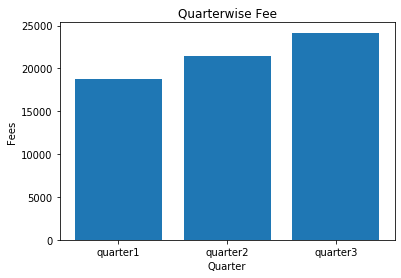

In [14]:
# Que 3
#scan to search data and analyze it
# this loop for checking that scan admission no is in record or not
while True:
    while True:#checking exception i n scan_admissionno
        try:
            scan_admission=int(input('Enter Admission No:'))
            break
        except:
            print('\t\t******Please enter only integer*******')
    # to take all values of perticular admission_No
    scan_lst=[]
    #creates dataframes of both csv files
    df=pd.read_csv('ChildRegistration_main.csv')
    df1=pd.read_csv('ChildFee_main.csv')
    #add admissionno into ad_lst
    ad_lst=list(df1['AdmissionNo'])
    #add all years into year_lst
    year_lst=list(df1['Year'])
    #add all quarters into list
    quarter_lst=list(df1['QuarterNo'])
    #add amount into amount list
    amt_lst=list(df1['Amount'])
    #add all transition id into tid_lst
    tid_lst=list(df1['TransitionId'])
    count_index=0
    find=0
    for ad in list(df1['AdmissionNo']):
        if(scan_admission==ad):
            temp_lst=[]
            find+=1
            #append all values into temp_lst
            temp_lst.append(ad)
            #temp_index=ad_lst.index(ad)
            temp_lst.append(year_lst[count_index])
            temp_lst.append(quarter_lst[count_index])
            temp_lst.append(amt_lst[count_index])
            temp_lst.append(tid_lst[count_index])
            scan_lst.append(temp_lst)
        count_index+=1
    if(find==0):
        print('\t\t******Please register first this admission no is not in register******')
    else:
        break
print('\n\nAdno ,year,quarterno,amount,transition_id')
for std in scan_lst:
    print(std)
#scan year from user to see bar graph of that admissionno
# first loop for checking scan year is in record or not
while True:
    while True:#to check exception of scan_year
        try:
            scan_year=int(input('Enter Year:'))
            break
        except:
            print('\t\t*****Enter Valid Year*******')
    if(scan_year in set(yr[1] for yr in scan_lst)):
        break
    else:
        print('\t\t*****This year is not in registration please enter correct year******')
#create dict of scan year of selected admission no 
quarterno_lst={}
for sub in scan_lst:
    if(scan_year==sub[1]):
        #add quarter and its fees into 
        quarterno_lst[sub[2]]=sub[3]
print(quarterno_lst)
x=[]
y=[]
#takes keys of dict into x 
x=quarterno_lst.keys()
#takes values of dict into y
y=quarterno_lst.values()
xt=['quarter'+str(i) for i in x]
print(xt)
#plot bar graph
plt.bar(range(len(quarterno_lst)),y)
plt.xticks(range(len(quarterno_lst)),xt)
plt.xlabel('Quarter')
plt.ylabel('Fees')
plt.title('Quarterwise Fee')
plt.show()



## Display following Summary for each and every child
### Format of summary:
#### 1) Child Admission Number
#### 2) Child Name
#### 3) Year-wise fees paid

In [15]:
# que 4
#create dataframe of both
df=pd.read_csv('ChildRegistration_main.csv')
df1=pd.read_csv('ChildFee_main.csv')
#create dataframe groupby admission no
gdf=df.groupby('AdmissionNo')
#create dataframe groupby admissionno and year
gdf1=df1.groupby(['AdmissionNo','Year'])
for i,j in gdf:
    print('Child Admission Number :',i)
    print('Child Name :',j['ChildName'].to_string(index=False).strip(),end='\n\n')
    grand_total=0
    for k,m in gdf1:
        if(i>=k[0]):
            if(i==k[0]):
                print('Year :',k[1])
                print(m[['QuarterNo','Amount','TransitionId']])
                grand_total+=m['Amount'].sum()
                print('Total Fees Paid :',m['Amount'].sum(),end='\n\n')
                
        else:
            break
    print('\nGrand Total Fees Paid :',grand_total,end='\n\n\n')


Child Admission Number : 18166
Child Name : poojan

Year : 2016
     QuarterNo  Amount  TransitionId
110          1   23783           467
Total Fees Paid : 23783

Year : 2017
    QuarterNo  Amount  TransitionId
76          1   18632           451
88          2   22956           406
Total Fees Paid : 41588

Year : 2018
    QuarterNo  Amount  TransitionId
14          1   17144           168
79          2   17600           216
Total Fees Paid : 34744

Year : 2019
     QuarterNo  Amount  TransitionId
101          1   18446           378
116          2   21532           324
Total Fees Paid : 39978

Year : 2020
     QuarterNo  Amount  TransitionId
37           1   17766           492
144          2   18854           402
Total Fees Paid : 36620


Grand Total Fees Paid : 176713


Child Admission Number : 18167
Child Name : kjnsdf

Year : 2015
     QuarterNo  Amount  TransitionId
46           1   17380           422
100          2   21439           154
105          3   20589           234
118  

Total Fees Paid : 36962

Year : 2018
    QuarterNo  Amount  TransitionId
81          1   20428           123
Total Fees Paid : 20428

Year : 2019
     QuarterNo  Amount  TransitionId
22           1   23612           491
124          2   22603           440
Total Fees Paid : 46215

Year : 2020
     QuarterNo  Amount  TransitionId
12           1   23071           145
54           2   22645           187
125          3   19073           498
Total Fees Paid : 64789


Grand Total Fees Paid : 205656


Child Admission Number : 18178
Child Name : ids

Year : 2016
   QuarterNo  Amount  TransitionId
3          1   23783           197
Total Fees Paid : 23783

Year : 2017
    QuarterNo  Amount  TransitionId
32          1   18632           279
36          2   22956           297
87          3   18526           193
Total Fees Paid : 60114

Year : 2018
     QuarterNo  Amount  TransitionId
25           1   17144           495
44           2   17600           166
140          3   23444           241
To